In [1]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

from scipy.signal import savgol_filter
import octopus as oct

In [2]:
# Analysis of LPi4-3 cells
filenames =['R38G02_GC6f_PM4_002_2021-03-02_12.33_Ftrace_mean_TM',
            '2022_07_12_R38G02_GC6f_PM4_005_2022-07-12_16.07_Ftrace_mean_TM',
            '2022_07_15_R38G02_GC6f_PM4_002_2022-07-15_11.20_Ftrace_mean_TM',
            '2022_07_19_R38G02_GC6f_PM4_225_005_2022-07-19_15.33_Ftrace_mean_TM',
            '2022_07_20_R38G02_GC6f_PM4_225_005_2022-07-20_11.22_Ftrace_mean_TM',
            '2022_07_20_R38G02_GC6f_PM4_009_2022-07-20_13.15_Ftrace_mean_TM']

In [5]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)

Ftrace_mean = np.mean(Ftrace_all[63:180,:,:], axis=0)

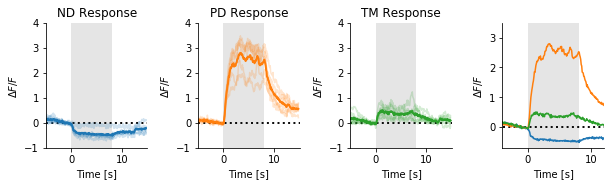

In [6]:
# PLOT dF/F fluorescence traces (Ftrace)

fig = plt.figure(figsize = (10,2.3))
plt.subplots_adjust(wspace=0.5)
colors = sb.color_palette('husl')
    
ax = fig.add_subplot(141)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,0,:], color = 'C0', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C0', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-1,4])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('ND Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(142)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,1,:], color = 'C1', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C1', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-1,4])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('PD Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(143)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,2,:], color = 'C2', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-1,4])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('TM Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(144)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C0', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C1', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 1.5)
plt.xlim([-4,12])
plt.ylim([-0.7,3.5])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
#ax.set_title('TM Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

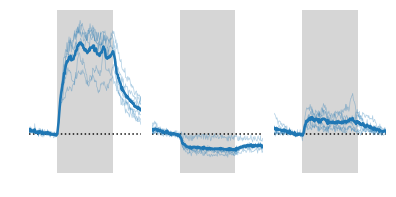

In [7]:
fig = plt.figure(figsize = (6.4,3))
plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,0,:], color = 'C0', alpha = 0.35, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C0', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-1.2,3.8])
plt.axis('off') 

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,1,:], color = 'C0', alpha = 0.35, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C0', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-1.2,3.8])
plt.axis('off')

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,2,:], color = 'C0', alpha = 0.35, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C0', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-1.2,3.8])

plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('FigS5_R38G02_GC6f_TM_all_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

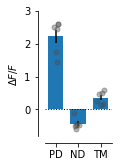

In [8]:
# Make Bar Plot of Responses
pos = [0, 1, 2]
fig = plt.figure(figsize = (0.5*len(pos)-0.3, 2.3))

ax = fig.add_subplot(111)
w=0.7

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

ax.bar(1,height=[np.mean(Ftrace_mean[0,:])],width=w,color='C0',yerr=[stats.sem(Ftrace_mean[0,:])])
for i in range(len(Ftrace_mean[0,:])):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4, Ftrace_mean[0,i], s=25, color='0.3', alpha=0.4, zorder = 2)
    
ax.bar(0,height=[np.mean(Ftrace_mean[1,:])],width=w,color='C0',yerr=[stats.sem(Ftrace_mean[1,:])])
for i in range(len(filenames)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4, Ftrace_mean[1,i], s=25, color='0.3', alpha=0.4, zorder = 2)
    
ax.bar(2,height=[np.mean(Ftrace_mean[2,:])],width=w,color='C0',yerr=[stats.sem(Ftrace_mean[2,:])])
for i in range(len(Ftrace_mean[2,:])):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4, Ftrace_mean[2,i], s=25, color='0.3', alpha=0.4, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks([0,1,2])
ax.set_xticklabels(('PD', 'ND', 'TM'), size=10)
ax.set_ylabel('$\Delta F/F$', size=10)
plt.ylim([-0.8,3])

bbox_inches = 'tight'
#plt.savefig('FigS5_R38G02_GC6f_TM_boxplots.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [9]:
# Calculate Motion Opponent Suppression Index
MOSI = (Ftrace_mean[1,:] - Ftrace_mean[2,:]) / (Ftrace_mean[1,:])

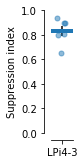

In [10]:
# Make Scatter Plot of MOSI

pos = [0]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [MOSI]
colors = ['C0', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('LPi4-3','TNT'), size=10)
ax.set_ylabel('Suppression index', size=10)
plt.ylim([0,1])

bbox_inches = 'tight'
#plt.savefig('FigS5_R38G02_GC6f_TM_MOSI.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()